In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# Membuat variabel input
magnitudo = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'magnitudo')
kedalaman = ctrl.Antecedent(np.arange(0, 1001, 1), 'kedalaman')

In [3]:
# Membuat variabel output
keparahan = ctrl.Consequent(np.arange(0, 11, 1), 'keparahan')

In [4]:
# Mendefinisikan fungsi keanggotaan untuk setiap variabel
magnitudo['rendah'] = fuzz.trimf(magnitudo.universe, [0, 0, 4])
magnitudo['sedang'] = fuzz.trimf(magnitudo.universe, [1, 5, 9])
magnitudo['tinggi'] = fuzz.trimf(magnitudo.universe, [6, 10, 10])

kedalaman['rendah'] = fuzz.trimf(kedalaman.universe, [0, 0, 300])
kedalaman['sedang'] = fuzz.trimf(kedalaman.universe, [100, 500, 900])
kedalaman['tinggi'] = fuzz.trimf(kedalaman.universe, [600, 1000, 1000])

keparahan['ringan'] = fuzz.trimf(keparahan.universe, [0, 0, 5])
keparahan['sedang'] = fuzz.trimf(keparahan.universe, [2, 5, 8])
keparahan['berat'] = fuzz.trimf(keparahan.universe, [5, 10, 10])

In [5]:
# Membuat aturan fuzzy
rule1 = ctrl.Rule(magnitudo['rendah'] & kedalaman['rendah'], keparahan['ringan'])
rule2 = ctrl.Rule(magnitudo['rendah'] & kedalaman['sedang'], keparahan['ringan'])
rule3 = ctrl.Rule(magnitudo['rendah'] & kedalaman['tinggi'], keparahan['sedang'])
rule4 = ctrl.Rule(magnitudo['sedang'] & kedalaman['rendah'], keparahan['ringan'])
rule5 = ctrl.Rule(magnitudo['sedang'] & kedalaman['sedang'], keparahan['sedang'])
rule6 = ctrl.Rule(magnitudo['sedang'] & kedalaman['tinggi'], keparahan['sedang'])
rule7 = ctrl.Rule(magnitudo['tinggi'] & kedalaman['rendah'], keparahan['sedang'])
rule8 = ctrl.Rule(magnitudo['tinggi'] & kedalaman['sedang'], keparahan['berat'])
rule9 = ctrl.Rule(magnitudo['tinggi'] & kedalaman['tinggi'], keparahan['berat'])

In [6]:
# Membuat sistem kontrol fuzzy
tsunami_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tsunami_sim = ctrl.ControlSystemSimulation(tsunami_ctrl)

In [14]:
# Input dari pengguna
magnitudo_input = float(input("Masukkan magnitudo gempa (0-10): "))
kedalaman_input = float(input("Masukkan kedalaman air 1(meter): "))

Masukkan magnitudo gempa (0-10): 5.2
Masukkan kedalaman air 1(meter): 48


In [15]:
# Menetapkan input pada sistem kontrol fuzzy
tsunami_sim.input['magnitudo'] = magnitudo_input
tsunami_sim.input['kedalaman'] = kedalaman_input

In [16]:
# Melakukan perhitungan sistem kontrol fuzzy
tsunami_sim.compute()

In [17]:
# Menampilkan hasil output
t_parah = tsunami_sim.output['keparahan']
print("Tingkat keparahan tsunami: ",t_parah )

Tingkat keparahan tsunami:  1.7034482758620688


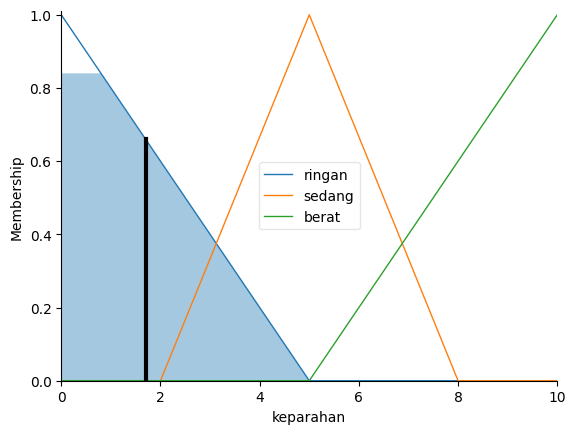

In [18]:
# Menampilkan kurva keanggotaan untuk variabel output
keparahan.view(sim=tsunami_sim)

In [19]:
# Menggunakan if-else untuk menentukan tingkat keparahan berdasarkan input
if t_parah <= 3:
        tingkat_keparahan = "Ringan"
elif t_parah <=6:
        tingkat_keparahan = "Sedang"
else:
        tingkat_keparahan = "Berat"

In [20]:
# Menampilkan hasil
print("Tingkat keparahan tsunami: ", tingkat_keparahan)

Tingkat keparahan tsunami:  Ringan
